In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# This is my "before" half of L&S Session 15 Exercise 7


In [2]:
x_nodes = ["X"+str(i) for i in range(9)]
x_edges = [
    (x_nodes[0],x_nodes[4]),
    (x_nodes[1],x_nodes[5]),
    (x_nodes[2],x_nodes[6]),
    (x_nodes[3],x_nodes[8]),
    (x_nodes[4],x_nodes[5]),
    (x_nodes[5],x_nodes[6]),
    (x_nodes[6],x_nodes[7]),
    (x_nodes[7],x_nodes[5]),
    (x_nodes[8],x_nodes[3])
]
XG = nx.DiGraph()
XG.add_nodes_from(x_nodes)
XG.add_edges_from(x_edges)


In [3]:
y_nodes = ["Y"+y for y in ["p", "q", "r", "s", "t", "v", "u", "m", "l", "w", "x", "y", "z"]]

y_edges = [
    (y_nodes[0],y_nodes[2]),
    (y_nodes[1],y_nodes[2]),
    (y_nodes[2],y_nodes[4]),
    (y_nodes[3],y_nodes[4]),
    (y_nodes[4],y_nodes[5]),
    (y_nodes[5],y_nodes[6]),
    (y_nodes[6],y_nodes[3]),
    (y_nodes[7],y_nodes[8]),
    (y_nodes[8],y_nodes[7]),
    (y_nodes[9],y_nodes[10]),
    (y_nodes[10],y_nodes[11]),
    (y_nodes[11],y_nodes[9]),
    (y_nodes[12],y_nodes[11])
]
YG = nx.DiGraph()
YG.add_nodes_from(y_nodes)
YG.add_edges_from(y_edges)

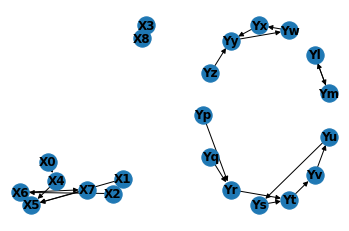

In [4]:
subax1 = plt.subplot(121)
nx.draw(XG, with_labels=True, font_weight='bold')
subax2 = plt.subplot(122)
nx.draw_shell(YG, with_labels=True, font_weight='bold')

In [5]:
def make_one_hot(idx,size):
  return np.array([1 if idx == x else 0 for x in range(size)])

In [6]:
def follow_endomap(G,n):
  return list(G.successors(n))[0]

In [7]:
def make_presentation(G):
  G_nodes = list(G.nodes())
  ones_G = np.full((len(G_nodes),),1)
  GA =  nx.adjacency_matrix(G)
  G_arrows_in =  np.matmul(ones_G,GA.toarray())
  G_arrows_by_node = sorted(zip(range(len(G_nodes)),G_arrows_in), key=lambda x: x[1])
  G_presentation = {}
  G_relations = {}
  for k,v in G_arrows_by_node:
    print(f"Checking node {k} with {v} arrows in")
    if v == 0:
      print(f"Adding root generator {G_nodes[k]}")
      G_presentation[G_nodes[k]] = (G_nodes[k],v)
      next_node = follow_endomap(G,G_nodes[k])
      steps = 1
      while not next_node in G_presentation:
        print(f"Adding follow up node {next_node}: {steps} from {G_nodes[k]}")
        G_presentation[next_node] = (G_nodes[k],steps)
        next_node = follow_endomap(G,next_node)
        steps += 1
      print(f"next node {next_node} already has presentation")
      G_relations[G_nodes[k]] = ((G_nodes[k],steps),G_presentation[next_node])
    elif v == 1:
      print(f"Only 1 way into node {k}")
      if G_nodes[k] in G_presentation:
        print("already has a presentation")
      else:
        print("Found potential loop")
        G_presentation[G_nodes[k]] = (G_nodes[k],0)
        next_node = follow_endomap(G,G_nodes[k])
        steps = 1
        while not next_node in G_presentation:
          print(f"Adding follow up node {next_node}: {steps} from {G_nodes[k]}")
          G_presentation[next_node] = (G_nodes[k],steps)
          next_node = follow_endomap(G,next_node)
          steps += 1
        print(f"next node {next_node} already has presentation")
        G_relations[G_nodes[k]] = ((G_nodes[k],steps),G_presentation[next_node])
    else:
      print(f"More than 1 way in")

  return {
      "generators":list(G_relations.keys()),
      "relations":list(G_relations.values())
  }
    

In [8]:
endomap_alpha = make_presentation(XG)
print(endomap_alpha)

Checking node 0 with 0 arrows in
Adding root generator X0
Adding follow up node X4: 1 from X0
Adding follow up node X5: 2 from X0
Adding follow up node X6: 3 from X0
Adding follow up node X7: 4 from X0
next node X5 already has presentation
Checking node 1 with 0 arrows in
Adding root generator X1
next node X5 already has presentation
Checking node 2 with 0 arrows in
Adding root generator X2
next node X6 already has presentation
Checking node 3 with 1 arrows in
Only 1 way into node 3
Found potential loop
Adding follow up node X8: 1 from X3
next node X3 already has presentation
Checking node 4 with 1 arrows in
Only 1 way into node 4
already has a presentation
Checking node 7 with 1 arrows in
Only 1 way into node 7
already has a presentation
Checking node 8 with 1 arrows in
Only 1 way into node 8
already has a presentation
Checking node 6 with 2 arrows in
More than 1 way in
Checking node 5 with 3 arrows in
More than 1 way in
{'generators': ['X0', 'X1', 'X2', 'X3'], 'relations': [(('X0', 5

/tmp/ipykernel_69979/1978947672.py:4: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  GA =  nx.adjacency_matrix(G)


In [9]:
endomap_beta = make_presentation(YG)
print(endomap_beta)

Checking node 0 with 0 arrows in
Adding root generator Yp
Adding follow up node Yr: 1 from Yp
Adding follow up node Yt: 2 from Yp
Adding follow up node Yv: 3 from Yp
Adding follow up node Yu: 4 from Yp
Adding follow up node Ys: 5 from Yp
next node Yt already has presentation
Checking node 1 with 0 arrows in
Adding root generator Yq
next node Yr already has presentation
Checking node 12 with 0 arrows in
Adding root generator Yz
Adding follow up node Yy: 1 from Yz
Adding follow up node Yw: 2 from Yz
Adding follow up node Yx: 3 from Yz
next node Yy already has presentation
Checking node 3 with 1 arrows in
Only 1 way into node 3
already has a presentation
Checking node 5 with 1 arrows in
Only 1 way into node 5
already has a presentation
Checking node 6 with 1 arrows in
Only 1 way into node 6
already has a presentation
Checking node 7 with 1 arrows in
Only 1 way into node 7
Found potential loop
Adding follow up node Yl: 1 from Ym
next node Ym already has presentation
Checking node 8 with 1 

/tmp/ipykernel_69979/1978947672.py:4: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  GA =  nx.adjacency_matrix(G)


In [10]:
XG2 = nx.DiGraph()
x2_nodes = [x_nodes[-1-i] for i in range(len(x_nodes))]
print(x2_nodes)
XG2.add_nodes_from(x2_nodes)
XG2.add_edges_from(x_edges)
endomap_alpha_prime = make_presentation(XG2)
print(endomap_alpha_prime)

['X8', 'X7', 'X6', 'X5', 'X4', 'X3', 'X2', 'X1', 'X0']
Checking node 6 with 0 arrows in
Adding root generator X2
Adding follow up node X6: 1 from X2
Adding follow up node X7: 2 from X2
Adding follow up node X5: 3 from X2
next node X6 already has presentation
Checking node 7 with 0 arrows in
Adding root generator X1
next node X5 already has presentation
Checking node 8 with 0 arrows in
Adding root generator X0
Adding follow up node X4: 1 from X0
next node X5 already has presentation
Checking node 0 with 1 arrows in
Only 1 way into node 0
Found potential loop
Adding follow up node X3: 1 from X8
next node X8 already has presentation
Checking node 1 with 1 arrows in
Only 1 way into node 1
already has a presentation
Checking node 4 with 1 arrows in
Only 1 way into node 4
already has a presentation
Checking node 5 with 1 arrows in
Only 1 way into node 5
already has a presentation
Checking node 2 with 2 arrows in
More than 1 way in
Checking node 3 with 3 arrows in
More than 1 way in
{'generat

/tmp/ipykernel_69979/1978947672.py:4: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  GA =  nx.adjacency_matrix(G)


In [11]:
def print_map_info(endomap):
  for idx,v in enumerate(endomap["relations"]):
    print(f"Relation {idx} {v}")
    if v[0][0] == v[1][0]:
      cl = abs(v[0][1] - v[1][1])
      mins = min(v[0][1],v[1][1])
      print(f"{v[0][0]} leads to cycle of length {cl} after {mins} steps")
    else:
      if v[0][1] > v[1][1]:
          stdf = v[0][1] - v[1][1]
          print(f"{v[1][0]} leads to {v[0][0]} after {stdf} steps")
      else:
          stdf = v[1][1] - v[0][1]
          print(f"{v[0][0]} leads to {v[1][0]} after {stdf} steps")

In [12]:
print_map_info(endomap_alpha)
print("~~~~~~~~~~~~~~~~~~~")
print_map_info(endomap_beta)

Relation 0 (('X0', 5), ('X0', 2))
X0 leads to cycle of length 3 after 2 steps
Relation 1 (('X1', 1), ('X0', 2))
X1 leads to X0 after 1 steps
Relation 2 (('X2', 1), ('X0', 3))
X2 leads to X0 after 2 steps
Relation 3 (('X3', 2), ('X3', 0))
X3 leads to cycle of length 2 after 0 steps
~~~~~~~~~~~~~~~~~~~
Relation 0 (('Yp', 6), ('Yp', 2))
Yp leads to cycle of length 4 after 2 steps
Relation 1 (('Yq', 1), ('Yp', 1))
Yq leads to Yp after 0 steps
Relation 2 (('Yz', 4), ('Yz', 1))
Yz leads to cycle of length 3 after 1 steps
Relation 3 (('Ym', 2), ('Ym', 0))
Ym leads to cycle of length 2 after 0 steps


In [13]:
def get_cycles(endomap):
  cycles_by_length = {}
  cycles_by_generator = {}
  for k,v in enumerate(endomap["relations"]):
    if v[0][0] == v[1][0]:
      cl = abs(v[0][1] - v[1][1])
      mins = min(v[0][1],v[1][1])
      print(f"{v[0][0]} leads to cycle of length {cl} after {mins} steps")
      if not cl in cycles_by_length:
        cycles_by_length[cl] = {
            "primary_generators":[k],
            "secondary_generators":[]
        }
      else:
        cycles_by_length[cl]['primary_generators'].append(k)
      cycles_by_generator[v[0][0]] = cl
    else:
      cl = cycles_by_generator[v[1][0]]
      cycles_by_length[cl]['secondary_generators'].append(k)
      cycles_by_generator[v[0][0]] = cl
  return {
      "cycles_by_length":cycles_by_length, 
      "cycles_by_generator":cycles_by_generator
  }

In [14]:
alpha_cycles = get_cycles(endomap_alpha)
print(alpha_cycles)
print("~~~~~~~~~~~~~~~~~~~~~~")
beta_cycles = get_cycles(endomap_beta)
print(beta_cycles)

X0 leads to cycle of length 3 after 2 steps
X3 leads to cycle of length 2 after 0 steps
{'cycles_by_length': {3: {'primary_generators': [0], 'secondary_generators': [1, 2]}, 2: {'primary_generators': [3], 'secondary_generators': []}}, 'cycles_by_generator': {'X0': 3, 'X1': 3, 'X2': 3, 'X3': 2}}
~~~~~~~~~~~~~~~~~~~~~~
Yp leads to cycle of length 4 after 2 steps
Yz leads to cycle of length 3 after 1 steps
Ym leads to cycle of length 2 after 0 steps
{'cycles_by_length': {4: {'primary_generators': [0], 'secondary_generators': [1]}, 3: {'primary_generators': [2], 'secondary_generators': []}, 2: {'primary_generators': [3], 'secondary_generators': []}}, 'cycles_by_generator': {'Yp': 4, 'Yq': 4, 'Yz': 3, 'Ym': 2}}


In [15]:
def iterate_endomap(endomap, start, steps):
  out_val = start
  for i in range(steps):
    out_val = follow_endomap(endomap,out_val)
  return out_val

In [16]:
print(iterate_endomap(XG,"X1",2))

X6


In [17]:
def make_assignments(gen,poss_vals):
  output = []
  for v in poss_vals:
    output.append({gen:v})
  return output

print(make_assignments("a",["x","y","z"]))

[{'a': 'x'}, {'a': 'y'}, {'a': 'z'}]


In [18]:
def join_assignments(ass1,ass2):
  if len(ass2)<len(ass1):
    return join_assignments(ass2,ass1)
  if len(ass1) == 0:
    return ass2

  output = []
  for a1 in ass1:
    for a2 in ass2:
      new_a1 = a1.copy()
      for k,v in zip(a2.keys(),a2.values()):
        new_a1[k] = v
      output.append(new_a1)
  return output
join_assignments(make_assignments("a",["x","y","z"]),make_assignments("b",["l","m"]))

[{'b': 'l', 'a': 'x'},
 {'b': 'l', 'a': 'y'},
 {'b': 'l', 'a': 'z'},
 {'b': 'm', 'a': 'x'},
 {'b': 'm', 'a': 'y'},
 {'b': 'm', 'a': 'z'}]

In [19]:
def find_predecessors(endomap,target,steps=1):
  preds = list(endomap.predecessors(target))
  if steps > 1 and len(preds) > 0:
    r_preds = []
    for t in preds:
      r_preds.extend(find_predecessors(endomap,t,steps-1))
    return r_preds
  else:
    return preds


In [20]:
find_predecessors(YG,"Yw",2)

['Yx', 'Yz']

In [21]:
assignments = []

for idx,rel in enumerate(endomap_alpha['relations']):
  print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
  x_gen = rel[0][0]
  print(f'Attempting to match relation on: {x_gen}')
  cl = alpha_cycles['cycles_by_generator'][x_gen]
  print(f'Cycle Length: {cl}')
  y_cycles = alpha_cycles['cycles_by_length'][cl]
  poss_y_gen = y_cycles['primary_generators']+y_cycles['secondary_generators']
  print(f"Possible Generators: {poss_y_gen}")

    
  print(f"Attempting to satisfy: {rel}")
  rel_lhs = iterate_endomap(XG,rel[0][0],rel[0][1])
  rel_rhs = iterate_endomap(XG,rel[1][0],rel[1][1])
  print(f"In X: {rel_lhs} = {rel_rhs}")
    
  for gen in poss_y_gen:
    print(f"Testing generator: {gen}")
    if rel[0][0]==rel[1][0]:
      print("Trying to match up a loop")
      seen_in_Y = set([])
      eligible_subs = {}
      cur_y = endomap_beta['generators'][gen]
      y_steps = 0
      found_pairs = []
      while not cur_y in seen_in_Y:
        lhs = iterate_endomap(YG,cur_y,rel[0][1])
        rhs = iterate_endomap(YG,cur_y,rel[1][1])
        if lhs == rhs:
          print(f"Potential match at {cur_y}! {y_steps} from {gen}")
          found_pairs.append(cur_y)
        seen_in_Y.add(cur_y)
        y_steps += 1
        cur_y = iterate_endomap(YG,cur_y,1)

      print(f"Potential matches for {x_gen}: {found_pairs}")
      new_assignments = make_assignments(x_gen,found_pairs)
      print(f"New assignments: {new_assignments}")
      assignments = join_assignments(assignments,new_assignments)
      print(f"Joined assignments: {assignments}")
    else:
      print("Trying to match up a chain")
      new_assignments = []
      print(f"Existing Assignments: {assignments}")
      for ass in assignments:
        print(f"* Checking {ass}")
        if rel[1][0] in ass.keys():
          print(f"\t Found assignment from {rel[1][0]} to {ass[rel[1][0]]}")
          y_target = ass[rel[1][0]]

          x_lhs = iterate_endomap(XG,rel[0][0],rel[0][1])
          print(f"\tIn X: {rel[0][1]} steps from {rel[0][0]} is {x_lhs}")
          x_rhs = iterate_endomap(XG,rel[1][0],rel[1][1])
          print(f"\tIn X: {rel[1][1]} steps from {rel[1][0]} is {x_rhs}")


          y_rhs = iterate_endomap(YG,y_target,rel[1][1])
          print(f"\tIn Y: {rel[1][1]} steps from {y_target} is {y_rhs}")

          print(f"\tThis means {rel[0][0]} needs to map to {y_rhs} after {rel[0][1]} steps")
          poss_vals = find_predecessors(YG,y_rhs,rel[0][1])
          print(f"\tPossible Predecessors: {poss_vals}")

          for v in poss_vals:
            new_ass = ass.copy()
            new_ass[rel[0][0]] = v
            print(f"\tAdding new assignment: {new_ass}")
            new_assignments.append(new_ass)
      print("Done checking old assignments")
      print(f"New assignments({len(new_assignments)}): {new_assignments}")

      assignments = new_assignments

print(f"Pre-dupe removal: {len(assignments)}")
    
remove_dupes = set([str(x) for x in assignments])    
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print(f"Final assignment count: {len(remove_dupes)}")
print(remove_dupes)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Attempting to match relation on: X0
Cycle Length: 3
Possible Generators: [0, 1, 2]
Attempting to satisfy: (('X0', 5), ('X0', 2))
In X: X5 = X5
Testing generator: 0
Trying to match up a loop
Potential matches for X0: []
New assignments: []
Joined assignments: []
Testing generator: 1
Trying to match up a loop
Potential matches for X0: []
New assignments: []
Joined assignments: []
Testing generator: 2
Trying to match up a loop
Potential match at Yz! 0 from 2
Potential match at Yy! 1 from 2
Potential match at Yw! 2 from 2
Potential match at Yx! 3 from 2
Potential matches for X0: ['Yz', 'Yy', 'Yw', 'Yx']
New assignments: [{'X0': 'Yz'}, {'X0': 'Yy'}, {'X0': 'Yw'}, {'X0': 'Yx'}]
Joined assignments: [{'X0': 'Yz'}, {'X0': 'Yy'}, {'X0': 'Yw'}, {'X0': 'Yx'}]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Attempting to match relation on: X1
Cycle Length: 3
Possible Generators: [0, 1, 2]
Attempting to satisfy: (('X1', 1), ('X0', 2))
In X: X5 = X5
Testing generator: 0
Trying to matc

In [22]:
#ok, we're supposed to have 14... where's the missing one?
#let's try smaller systems
sm_x_nodes = ["a", "b", "c", "α a", "α^2 a", "α^3 a", "α^4 a"]
sm_x_edges = [
    (sm_x_nodes[0],sm_x_nodes[3]),
    (sm_x_nodes[1],sm_x_nodes[4]),
    (sm_x_nodes[2],sm_x_nodes[5]),
    (sm_x_nodes[3],sm_x_nodes[4]),
    (sm_x_nodes[4],sm_x_nodes[5]),
    (sm_x_nodes[5],sm_x_nodes[6]),
    (sm_x_nodes[6],sm_x_nodes[4])
    
]
sm_XG = nx.DiGraph()
sm_XG.add_nodes_from(sm_x_nodes)
sm_XG.add_edges_from(sm_x_edges)


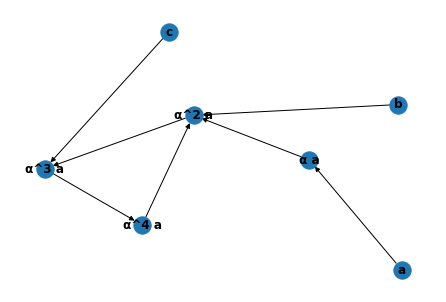

In [23]:
nx.draw(sm_XG, with_labels=True, font_weight='bold')


In [24]:
#let's try smaller systems
sm_y_nodes = ["w","x","y","z"]
sm_y_edges = [
    (sm_y_nodes[0],sm_y_nodes[1]),
    (sm_y_nodes[1],sm_y_nodes[2]),
    (sm_y_nodes[2],sm_y_nodes[0]),
    (sm_y_nodes[3],sm_y_nodes[2])
]
sm_YG = nx.DiGraph()
sm_YG.add_nodes_from(sm_y_nodes)
sm_YG.add_edges_from(sm_y_edges)


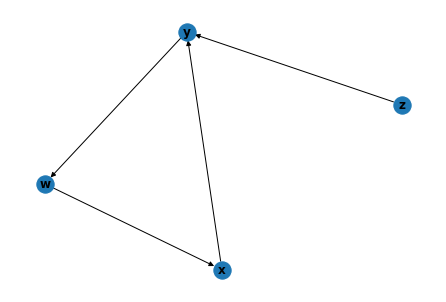

In [25]:
nx.draw(sm_YG, with_labels=True, font_weight='bold')


In [26]:
sm_X_alpha = make_presentation(sm_XG)
sm_Y_beta = make_presentation(sm_YG)

Checking node 0 with 0 arrows in
Adding root generator a
Adding follow up node α a: 1 from a
Adding follow up node α^2 a: 2 from a
Adding follow up node α^3 a: 3 from a
Adding follow up node α^4 a: 4 from a
next node α^2 a already has presentation
Checking node 1 with 0 arrows in
Adding root generator b
next node α^2 a already has presentation
Checking node 2 with 0 arrows in
Adding root generator c
next node α^3 a already has presentation
Checking node 3 with 1 arrows in
Only 1 way into node 3
already has a presentation
Checking node 6 with 1 arrows in
Only 1 way into node 6
already has a presentation
Checking node 5 with 2 arrows in
More than 1 way in
Checking node 4 with 3 arrows in
More than 1 way in
Checking node 3 with 0 arrows in
Adding root generator z
Adding follow up node y: 1 from z
Adding follow up node w: 2 from z
Adding follow up node x: 3 from z
next node y already has presentation
Checking node 0 with 1 arrows in
Only 1 way into node 0
already has a presentation
Checkin

/tmp/ipykernel_69979/1978947672.py:4: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  GA =  nx.adjacency_matrix(G)


In [27]:

print(sm_X_alpha)
print("~~~~~~~~~~~~~~~~~~~")
print(sm_Y_beta)

{'generators': ['a', 'b', 'c'], 'relations': [(('a', 5), ('a', 2)), (('b', 1), ('a', 2)), (('c', 1), ('a', 3))]}
~~~~~~~~~~~~~~~~~~~
{'generators': ['z'], 'relations': [(('z', 4), ('z', 1))]}


In [28]:
4**7

16384

In [29]:
# okay, stepping back -- lets check ALL MAPS
def make_all_maps(xs,ys):
    x_size = len(xs)
    y_size = len(ys)
    total = y_size**x_size
    all_assignments = []
    for x in xs:
        new_maps = []
        for y in ys:
            new_maps.append({x:y})
        all_assignments = join_assignments(all_assignments,new_maps) 
    return all_assignments

In [30]:
sm_maps = make_all_maps(sm_x_nodes,sm_y_nodes)

In [31]:
print(len(sm_maps))
sm_maps[-4:]


16384


[{'α^4 a': 'z',
  'α^3 a': 'z',
  'α^2 a': 'z',
  'α a': 'z',
  'c': 'z',
  'a': 'z',
  'b': 'w'},
 {'α^4 a': 'z',
  'α^3 a': 'z',
  'α^2 a': 'z',
  'α a': 'z',
  'c': 'z',
  'a': 'z',
  'b': 'x'},
 {'α^4 a': 'z',
  'α^3 a': 'z',
  'α^2 a': 'z',
  'α a': 'z',
  'c': 'z',
  'a': 'z',
  'b': 'y'},
 {'α^4 a': 'z',
  'α^3 a': 'z',
  'α^2 a': 'z',
  'α a': 'z',
  'c': 'z',
  'a': 'z',
  'b': 'z'}]

In [32]:
sm_maps[0]

{'α^4 a': 'w',
 'α^3 a': 'w',
 'α^2 a': 'w',
 'α a': 'w',
 'c': 'w',
 'a': 'w',
 'b': 'w'}

In [33]:
def preserves_structure(f,x_graph,y_graph):
    for k,v in zip(f.keys(),f.values()):
        #print(f"f({k}) = {v}")
        alpha_x = follow_endomap(x_graph,k)
        f_alpha_x = f[alpha_x]
        #print(f"alpha({k}) = {alpha_x}")
        #print(f"f({alpha_x}) = {f_alpha_x}")
        beta_y = follow_endomap(y_graph,v)
        #print(f"beta({v}) = {beta_y}")
        if beta_y != f_alpha_x:
              #print("fails to preserve structure")
              return False
    return True

In [34]:
preserves_structure(sm_maps[0],sm_XG, sm_YG)

False

In [35]:
sm_evaluations = list(filter(lambda x: preserves_structure(x,sm_XG,sm_YG),sm_maps))


In [36]:
print(len(sm_evaluations))
print(sm_evaluations)

6
[{'α^4 a': 'w', 'α^3 a': 'y', 'α^2 a': 'x', 'α a': 'w', 'c': 'x', 'a': 'y', 'b': 'w'}, {'α^4 a': 'w', 'α^3 a': 'y', 'α^2 a': 'x', 'α a': 'w', 'c': 'z', 'a': 'y', 'b': 'w'}, {'α^4 a': 'x', 'α^3 a': 'w', 'α^2 a': 'y', 'α a': 'x', 'c': 'y', 'a': 'w', 'b': 'x'}, {'α^4 a': 'x', 'α^3 a': 'w', 'α^2 a': 'y', 'α a': 'x', 'c': 'y', 'a': 'w', 'b': 'z'}, {'α^4 a': 'y', 'α^3 a': 'x', 'α^2 a': 'w', 'α a': 'y', 'c': 'w', 'a': 'x', 'b': 'y'}, {'α^4 a': 'y', 'α^3 a': 'x', 'α^2 a': 'w', 'α a': 'y', 'c': 'w', 'a': 'z', 'b': 'y'}]


(X1) edge (X4)
(X2) edge (X5)
(X3) edge (X6)
(X4) edge (X5)
(X5) edge (X6)
(X6) edge (X7)
(X7) edge (X5)
(X8) edge (X1)


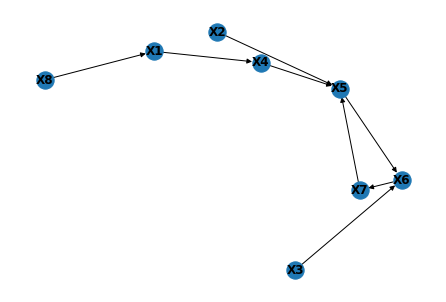

In [37]:
# IDEA: extend tail of 'a'


sm_z_nodes = ["X"+str(i+1) for i in range(8)]
sm_z_edges = [
    (sm_z_nodes[0],sm_z_nodes[3]),
    (sm_z_nodes[1],sm_z_nodes[4]),
    (sm_z_nodes[2],sm_z_nodes[5]),
    (sm_z_nodes[3],sm_z_nodes[4]),
    (sm_z_nodes[4],sm_z_nodes[5]),
    (sm_z_nodes[5],sm_z_nodes[6]),
    (sm_z_nodes[6],sm_z_nodes[4]),
    (sm_z_nodes[7],sm_z_nodes[0])
    
]
sm_ZG = nx.DiGraph()
sm_ZG.add_nodes_from(sm_z_nodes)
sm_ZG.add_edges_from(sm_z_edges)

# make my latex easier
print("\n".join(["("+e[0]+") edge ("+e[1]+")" for e in sm_z_edges]))

nx.draw(sm_ZG, with_labels=True, font_weight='bold')

In [38]:
my_missing_maps = make_all_maps(sm_z_nodes,sm_y_nodes)

In [39]:
missing_map_evaluations = list(filter(lambda x: preserves_structure(x,sm_ZG,sm_YG),my_missing_maps))

In [40]:
print(len(missing_map_evaluations))
print(missing_map_evaluations)

7
[{'X8': 'w', 'X7': 'y', 'X6': 'x', 'X5': 'w', 'X4': 'y', 'X3': 'w', 'X1': 'x', 'X2': 'y'}, {'X8': 'x', 'X7': 'w', 'X6': 'y', 'X5': 'x', 'X4': 'w', 'X3': 'x', 'X1': 'y', 'X2': 'w'}, {'X8': 'x', 'X7': 'w', 'X6': 'y', 'X5': 'x', 'X4': 'w', 'X3': 'z', 'X1': 'y', 'X2': 'w'}, {'X8': 'y', 'X7': 'x', 'X6': 'w', 'X5': 'y', 'X4': 'x', 'X3': 'y', 'X1': 'w', 'X2': 'x'}, {'X8': 'y', 'X7': 'x', 'X6': 'w', 'X5': 'y', 'X4': 'x', 'X3': 'y', 'X1': 'w', 'X2': 'z'}, {'X8': 'z', 'X7': 'w', 'X6': 'y', 'X5': 'x', 'X4': 'w', 'X3': 'x', 'X1': 'y', 'X2': 'w'}, {'X8': 'z', 'X7': 'w', 'X6': 'y', 'X5': 'x', 'X4': 'w', 'X3': 'z', 'X1': 'y', 'X2': 'w'}]
